In [7]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from sklearn.cluster import KMeans
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from PIL import Image
import glob

In [8]:
# 损失函数
def catastrophic_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# ANN
class ANN:
    def __init__(self, input_shape, num_classes):
        self.model = Sequential([
            Flatten(input_shape=input_shape),
            Dense(128, activation='relu'),
            Dense(128, activation='relu'),
            Dense(num_classes, activation='softmax')
        ])
        self.model.compile(optimizer='adam', loss=catastrophic_loss, metrics=['accuracy'])

    def fit(self, X_train, y_train, epochs=20, batch_size=32):
        self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

    def transform(self, X):
        return self.model.predict(X)

# KMeans
class KMeansClassifier:
    def __init__(self, n_clusters):
        self.model = KMeans(n_clusters=n_clusters)

    def fit(self, X):
        self.model.fit(X)

    def predict(self, X):
        return self.model.predict(X)

# StackingEnsemble
class StackingEnsemble:
    def __init__(self, ann_model, kmeans_model):
        self.ann_model = ann_model
        self.kmeans_model = kmeans_model

    def fit(self, X_train, y_train):
        self.ann_model.fit(X_train, y_train)
        features = self.ann_model.transform(X_train)
        self.kmeans_model.fit(features)

    def predict(self, X):
        features = self.ann_model.transform(X)
        print("features: ", features)
        print(features.shape)
        return self.kmeans_model.predict(features)

In [9]:
# 预处理
def load_images(image_paths):
    images = []
    labels = []
    target_size=(256, 256)

    for image_path in image_paths:
        # 打开图像并转换为RGB格式，确保没有透明度通道
        image = Image.open(image_path).convert('RGB').resize(target_size)
        image = np.array(image) / 255.0 
        label = image_path.split('/')[-2]  
        images.append(image)
        labels.append(label)

    return np.array(images), np.array(labels)

Text(0.5, 1.0, '8-Skoda')

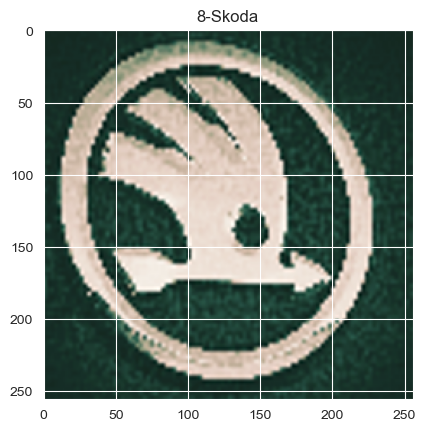

In [10]:
image_paths = glob.glob('Car_Logo_Dataset/**/*.png', recursive=True)
X, y = load_images(image_paths)

unique_labels = np.unique(y)
label_to_int = {label: i for i, label in enumerate(unique_labels)}
y = np.array([label_to_int[label] for label in y])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.imshow(X_test[99])
plt.title(unique_labels[y_test[99]])

In [11]:
# one-hot编码
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

ann = ANN(input_shape=X_train.shape[1:], num_classes=len(unique_labels))
kmeans = KMeansClassifier(n_clusters=len(unique_labels))

ensemble = StackingEnsemble(ann, kmeans)

ensemble.fit(X_train, y_train_one_hot)

predictions = ensemble.predict(X_test)

predictions

2023-12-03 08:06:53.122751: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-12-03 08:06:53.123583: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-03 08:06:53.123595: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-03 08:06:53.124696: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-03 08:06:53.125574: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/20


2023-12-03 08:06:55.354417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 3s 47ms/step - loss: 0.0577 - accuracy: 0.0414
Epoch 2/20
14/14 [==============================] - 0s 25ms/step - loss: 0.0603 - accuracy: 0.0345
Epoch 3/20
14/14 [==============================] - 0s 24ms/step - loss: 0.0603 - accuracy: 0.0345
Epoch 4/20
14/14 [==============================] - 0s 24ms/step - loss: 0.0603 - accuracy: 0.0345
Epoch 5/20
14/14 [==============================] - 0s 26ms/step - loss: 0.0603 - accuracy: 0.0345
Epoch 6/20
14/14 [==============================] - 0s 25ms/step - loss: 0.0603 - accuracy: 0.0345
Epoch 7/20
14/14 [==============================] - 0s 24ms/step - loss: 0.0603 - accuracy: 0.0345
Epoch 8/20
14/14 [==============================] - 0s 25ms/step - loss: 0.0603 - accuracy: 0.0345
Epoch 9/20
14/14 [==============================] - 0s 25ms/step - loss: 0.0603 - accuracy: 0.0345
Epoch 10/20
14/14 [==============================] - 0s 24ms/step - loss: 0.0603 - accuracy: 0.0345
Epoch 11/20
14/14 [=

2023-12-03 08:07:05.643412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/zhaochengxin/anaconda3/envs/Learn/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


1/4 [======>.......................] - ETA: 0s

/Users/zhaochengxin/anaconda3/envs/Learn/lib/python3.8/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (32). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


4/4 [==============================] - 0s 132ms/step
features:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(109, 32)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

混淆矩阵：
[[5 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 ...
 [2 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]]
分类报告：
              precision    recall  f1-score   support

           0       0.05      1.00      0.09         5
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         3
   

/Users/zhaochengxin/anaconda3/envs/Learn/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zhaochengxin/anaconda3/envs/Learn/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zhaochengxin/anaconda3/envs/Learn/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

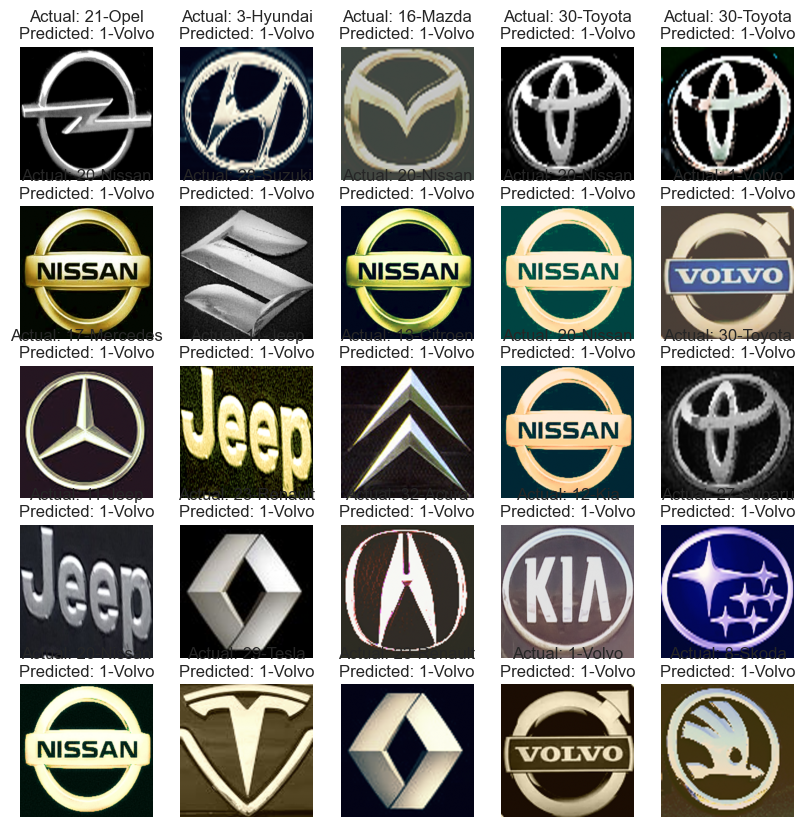

14/14 [==============================] - 0s 19ms/step


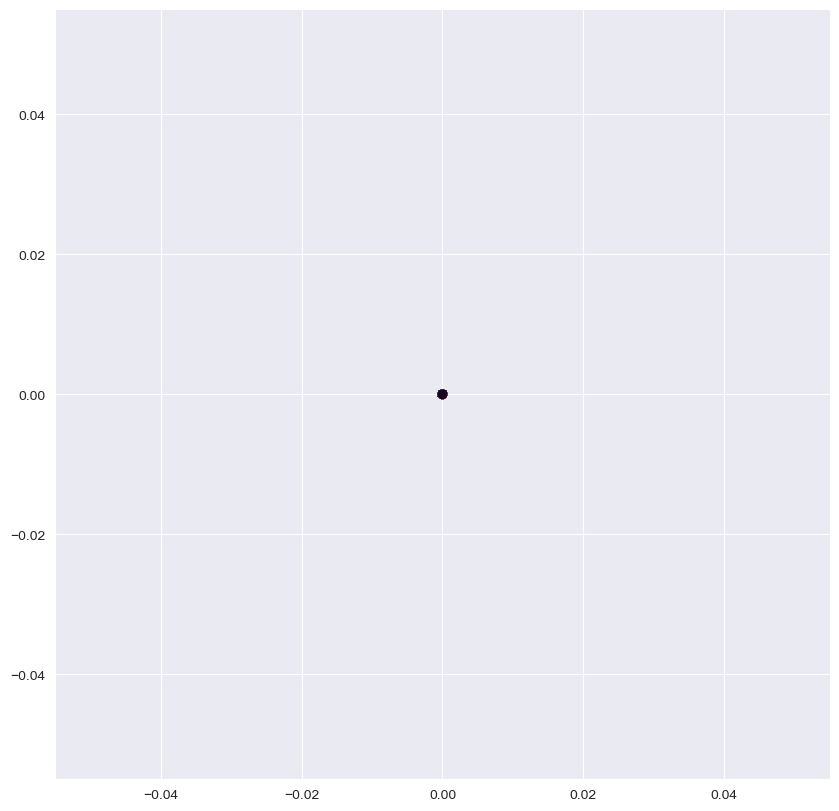

In [12]:
# 可视化结果
print("混淆矩阵：")
print(confusion_matrix(y_test, predictions))

print("分类报告：")
print(classification_report(y_test, predictions))

# 显示一些预测结果
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"Actual: {unique_labels[y_test[i]]}\nPredicted: {unique_labels[predictions[i]]}")
    plt.axis('off')
plt.show()

# 类聚的散点图
features = ann.transform(X_train)
plt.figure(figsize=(10, 10))
plt.scatter(features[:, 0], features[:, 1], c=y_train)
plt.show()